# implement imdb example via notebook

In [1]:
% matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
from examples import example_helper
import numpy as np
from keras.preprocessing import sequence
from keras.datasets import imdb
from deepmoji.model_def import deepmoji_architecture

Using TensorFlow backend.


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4130375257939025335
]


In [4]:
# Seed for reproducibility
np.random.seed(1337)

nb_tokens = 20000
maxlen = 80
batch_size = 32

In [5]:
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=nb_tokens)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')


Loading data...


/home/ubuntu/.virtualenv/keras_DL/local/lib/python2.7/site-packages/keras/datasets/imdb.py:45: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


25000 train sequences
25000 test sequences


In [6]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [7]:
print('Build model...')
model = deepmoji_architecture(nb_classes=2, nb_tokens=nb_tokens, maxlen=maxlen)
model.summary()


Build model...
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 80)            0                                            
____________________________________________________________________________________________________
embedding (Embedding)            (None, 80, 256)       5120000     input_1[0][0]                    
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 80, 256)       0           embedding[0][0]                  
____________________________________________________________________________________________________
bi_lstm_0 (Bidirectional)        (None, 80, 1024)      3149824     activation_1[0][0]               
____________________________________________________________________________

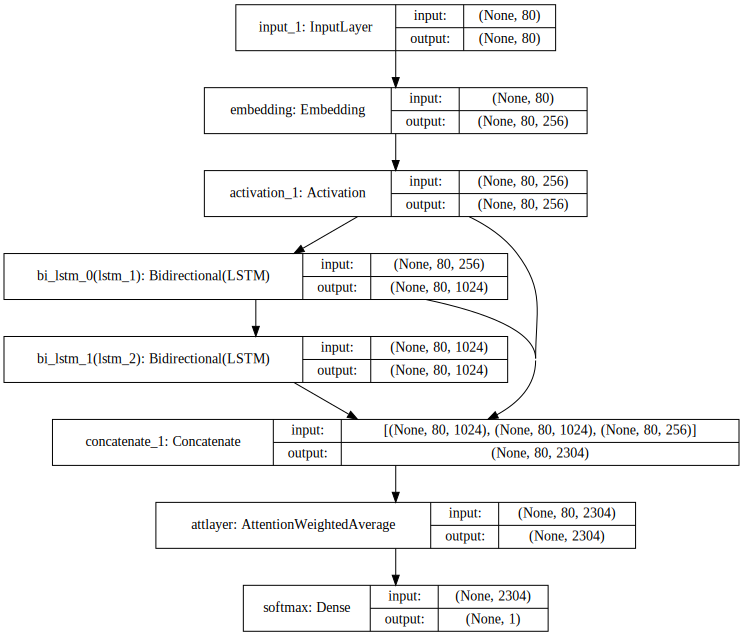

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
print('Train...')
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=1,
          validation_data=(X_test, y_test))

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
  832/25000 [..............................] - ETA: 2616s - loss: 0.5289 - acc: 0.7368

In [ ]:
print(history.history['acc'])

print(history.history['loss'])

In [ ]:
history.history

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)